In [ ]:
!kaggle datasets download camnugent/california-housing-prices
! unzip california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FastICA
from sklearn.datasets import fetch_openml

# Load the California housing dataset
housing = fetch_california_housing()

In [2]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for PLS and PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Apply PCA to the training data (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components retained
print(f'Number of PCA components: {X_train_pca.shape[1]}')

Number of PCA components: 6


In [7]:
# Instantiate a linear regression model
lr = LinearRegression()

# Perform RFE to select the top 10 features
rfe = RFE(estimator=lr, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Display the selected features
print(f'Selected features by RFE: {X.columns[rfe.support_].tolist()}')

Selected features by RFE: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


In [8]:
# Apply PLS Regression on the dataset reduced by PCA
pls_pca = PLSRegression(n_components=5)
pls_pca.fit(X_train_pca, y_train)
y_pred_pca = pls_pca.predict(X_test_pca)

# Apply PLS Regression on the dataset reduced by RFE
pls_rfe = PLSRegression(n_components=8)
pls_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = pls_rfe.predict(X_test_rfe)

# Evaluate the performance on PCA-reduced data
r2_pca = r2_score(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'PLS Regression on PCA dataset - R2 Score: {r2_pca}')
print(f'MSE for PCA: {mse_pca}')

# Evaluate the performance on RFE-reduced data
r2_rfe = r2_score(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print(f'PLS Regression on RFE dataset - R2 Score: {r2_rfe}')
print(f'MSE for RFE: {mse_rfe}')

PLS Regression on PCA dataset - R2 Score: 0.4876688925986027
MSE for PCA: 0.6713632829708936
PLS Regression on RFE dataset - R2 Score: 0.5757877060324508
MSE for RFE: 0.5558915986952444


In [12]:
# For LDA, we'll need to discretize the target variable
median_value = np.median(y)
y_binary = (y > median_value).astype(int)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Since we have 2 classes
X_lda = lda.fit_transform(X, y_binary)

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# Create DataFrames for visualization
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Label'] = y_binary

df_lda = pd.DataFrame(X_lda, columns=['Component 1'])
df_lda['Label'] = y_binary

df_ica = pd.DataFrame(X_ica, columns=['Component 1', 'Component 2'])

# Display the results
print("t-SNE Result:")
print(df_tsne.head())
print("\nLDA Result:")
print(df_lda.head())
print("\nICA Result:")
print(df_ica.head())

t-SNE Result:
   Component 1  Component 2  Label
0   -92.419289   -28.388741      1
1    64.244614   -50.142147      1
2   -90.177887    52.838516      1
3   -56.489964    57.592064      1
4   -51.541771    54.481396      1

LDA Result:
   Component 1  Label
0     2.621728      1
1     2.532452      1
2     2.112961      1
3     1.478022      1
4     0.540283      1

ICA Result:
   Component 1  Component 2
0     0.839606    -0.865841
1    -0.783135     0.528121
2     0.526650    -1.777299
3     0.468515    -1.792265
4     0.462460    -1.791002


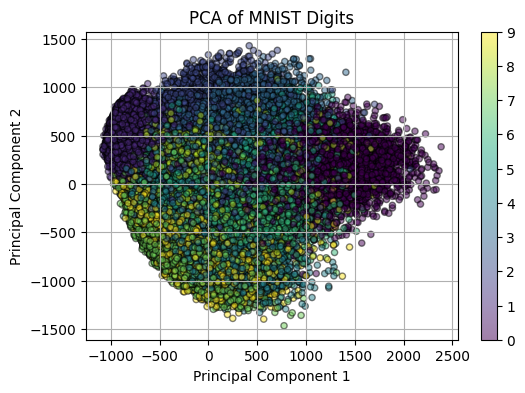

Explained variance ratio of the first two components: [0.09746116 0.07155445]


In [16]:
# Explore PCA on Image Data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Standardize the data (mean=0, variance=1)
X_meaned = X - np.mean(X, axis=0)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X_meaned)

# Plot the PCA results
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5, edgecolor='k', s=20)
plt.colorbar(scatter)
plt.title('PCA of MNIST Digits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Explained variance ratio
print("Explained variance ratio of the first two components:", pca.explained_variance_ratio_)